### Introduction
The <a href="https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset/downloads/lower-back-pain-symptoms-dataset.zip/1">dataset</a> from kaggle contains observations of people experiencing lower back pain. The goal of this project is to train a model to determine whether a sample is abnormal. This is beneficial to doctors and patients as being able to predict whether pain is normal with high accuracy will reduce the amount of misdiagnosis. 

The data will be explored using EDA. The task is binary classification so Naive Bayes, Random Forest, K Nearest Neighbors, and Support Vector Machines.       

Import the dataset and the libraries

In [34]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy import stats

# Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Performance
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dataset_spine.csv')

In [3]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


### Quick Overview of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [5]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Note: Since outliers may identify that someone is having problems in that area of the lower back, do not remove them.

Check for missing values

In [6]:
df.isna().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

Name our columns 

In [7]:
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 
              'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt',
              'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope', 'Target', 
              'Extra_Class']

See what's in the Extra_Class column

In [8]:
df['Extra_Class'].unique()

array([nan, 'Prediction is done by using binary classification.',
       'Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)',
       'Attribute class {Abnormal, Normal} '], dtype=object)

The extra column contains the names of each column/attribute. Since we named the columns, we don't need the extra column to identify them. 
Let's drop the Extra_Class column.

In [9]:
df = df.drop('Extra_Class', axis=1)

### EDA

First, let's understand what the data is that we are looking at.
We are given several different pelvic parameters, as they are known as, which can help us determine whether someone is normal or abnormal. Essentially, each number represents a different measurement of distance or angles of between different. Lower back pain can be caused by nerves, muscles, bones, ligaments, joints, or discs being damaged, sprained, or irritated. Any of these can cause pain in other parts of the body as well, since the spine is highly interconnected with the rest of the body. More specific details can be found  <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3175921/">here</a>.  

#### Visualize the amount of Abnormals and Normals
There are about 2 times as more abnormal cases than normal cases

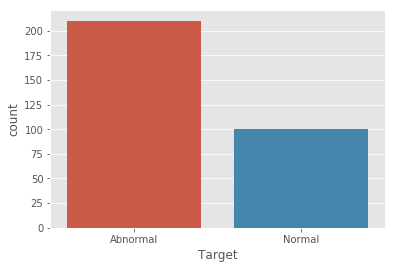

In [10]:
sns.countplot(df['Target'])
plt.show()

#### Correlation between features
See the correlation which is a numerical measure of the relationship between two variables. 

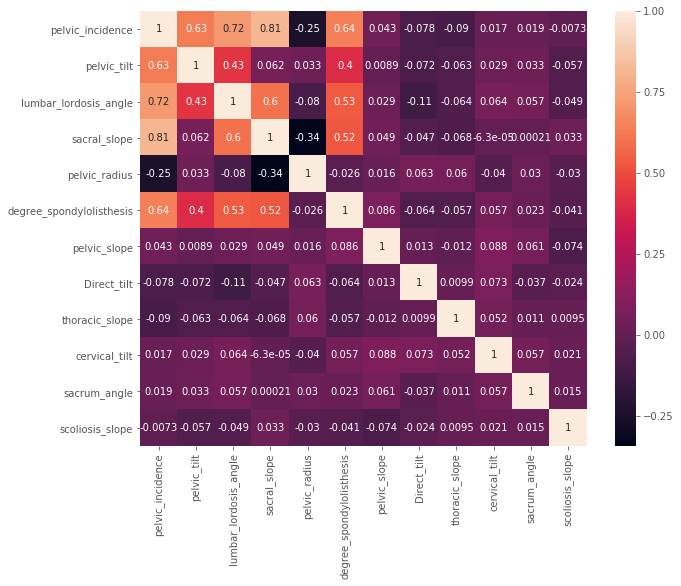

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Distributions of each feature
Seeing how each feature is distributed.       

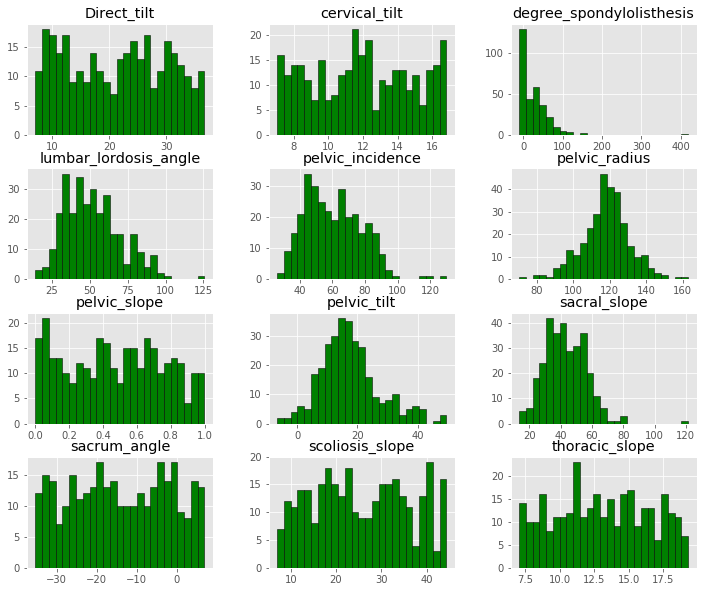

In [12]:
df.hist(figsize=(12, 10), bins=25, color='Green', ec='black')
plt.show()

#### Check for outliers
Even there are outliers, we can see that they are all classified as abnormal. Therefore, our model will recognize that outliers might be abnormal.

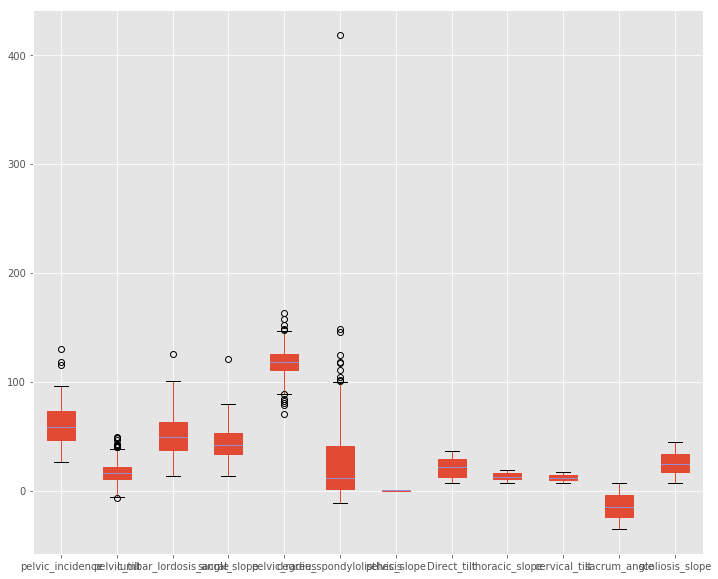

In [13]:
plt.figure(figsize=(12, 10))
df.boxplot(patch_artist=True)

In [14]:
outliers = df[((np.abs(stats.zscore(df.drop('Target', axis=1)))) > 3).any(axis=1)]

In [15]:
len(outliers)

12

In [16]:
outliers

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Target
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,0.946611,10.3840,9.5742,11.22353,4.641629,9.8472,Abnormal
85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,0.345235,31.8795,15.0011,15.89311,-10.750511,22.7075,Abnormal
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,0.597457,21.5943,7.5666,7.81812,-27.570464,17.8768,Abnormal
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,0.860223,18.5943,11.1514,11.36543,-34.202073,27.5144,Abnormal
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,0.099941,20.2822,10.3082,15.89258,-14.156070,39.9730,Abnormal
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,0.039380,19.8712,8.9861,14.77008,6.868423,29.1844,Abnormal
162,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,0.599393,35.8563,10.9266,13.11354,-17.520810,21.2408,Abnormal
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,0.542816,22.3317,8.8519,11.48960,-6.754004,32.5082,Abnormal
167,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,0.056944,31.8230,15.7134,9.36778,-33.489059,28.9479,Abnormal
179,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,0.379895,17.4281,16.0009,14.48126,-31.852569,30.5330,Abnormal


#### Determine if there is any obvious correlation between any of the features and the target


C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x1440 with 0 Axes>

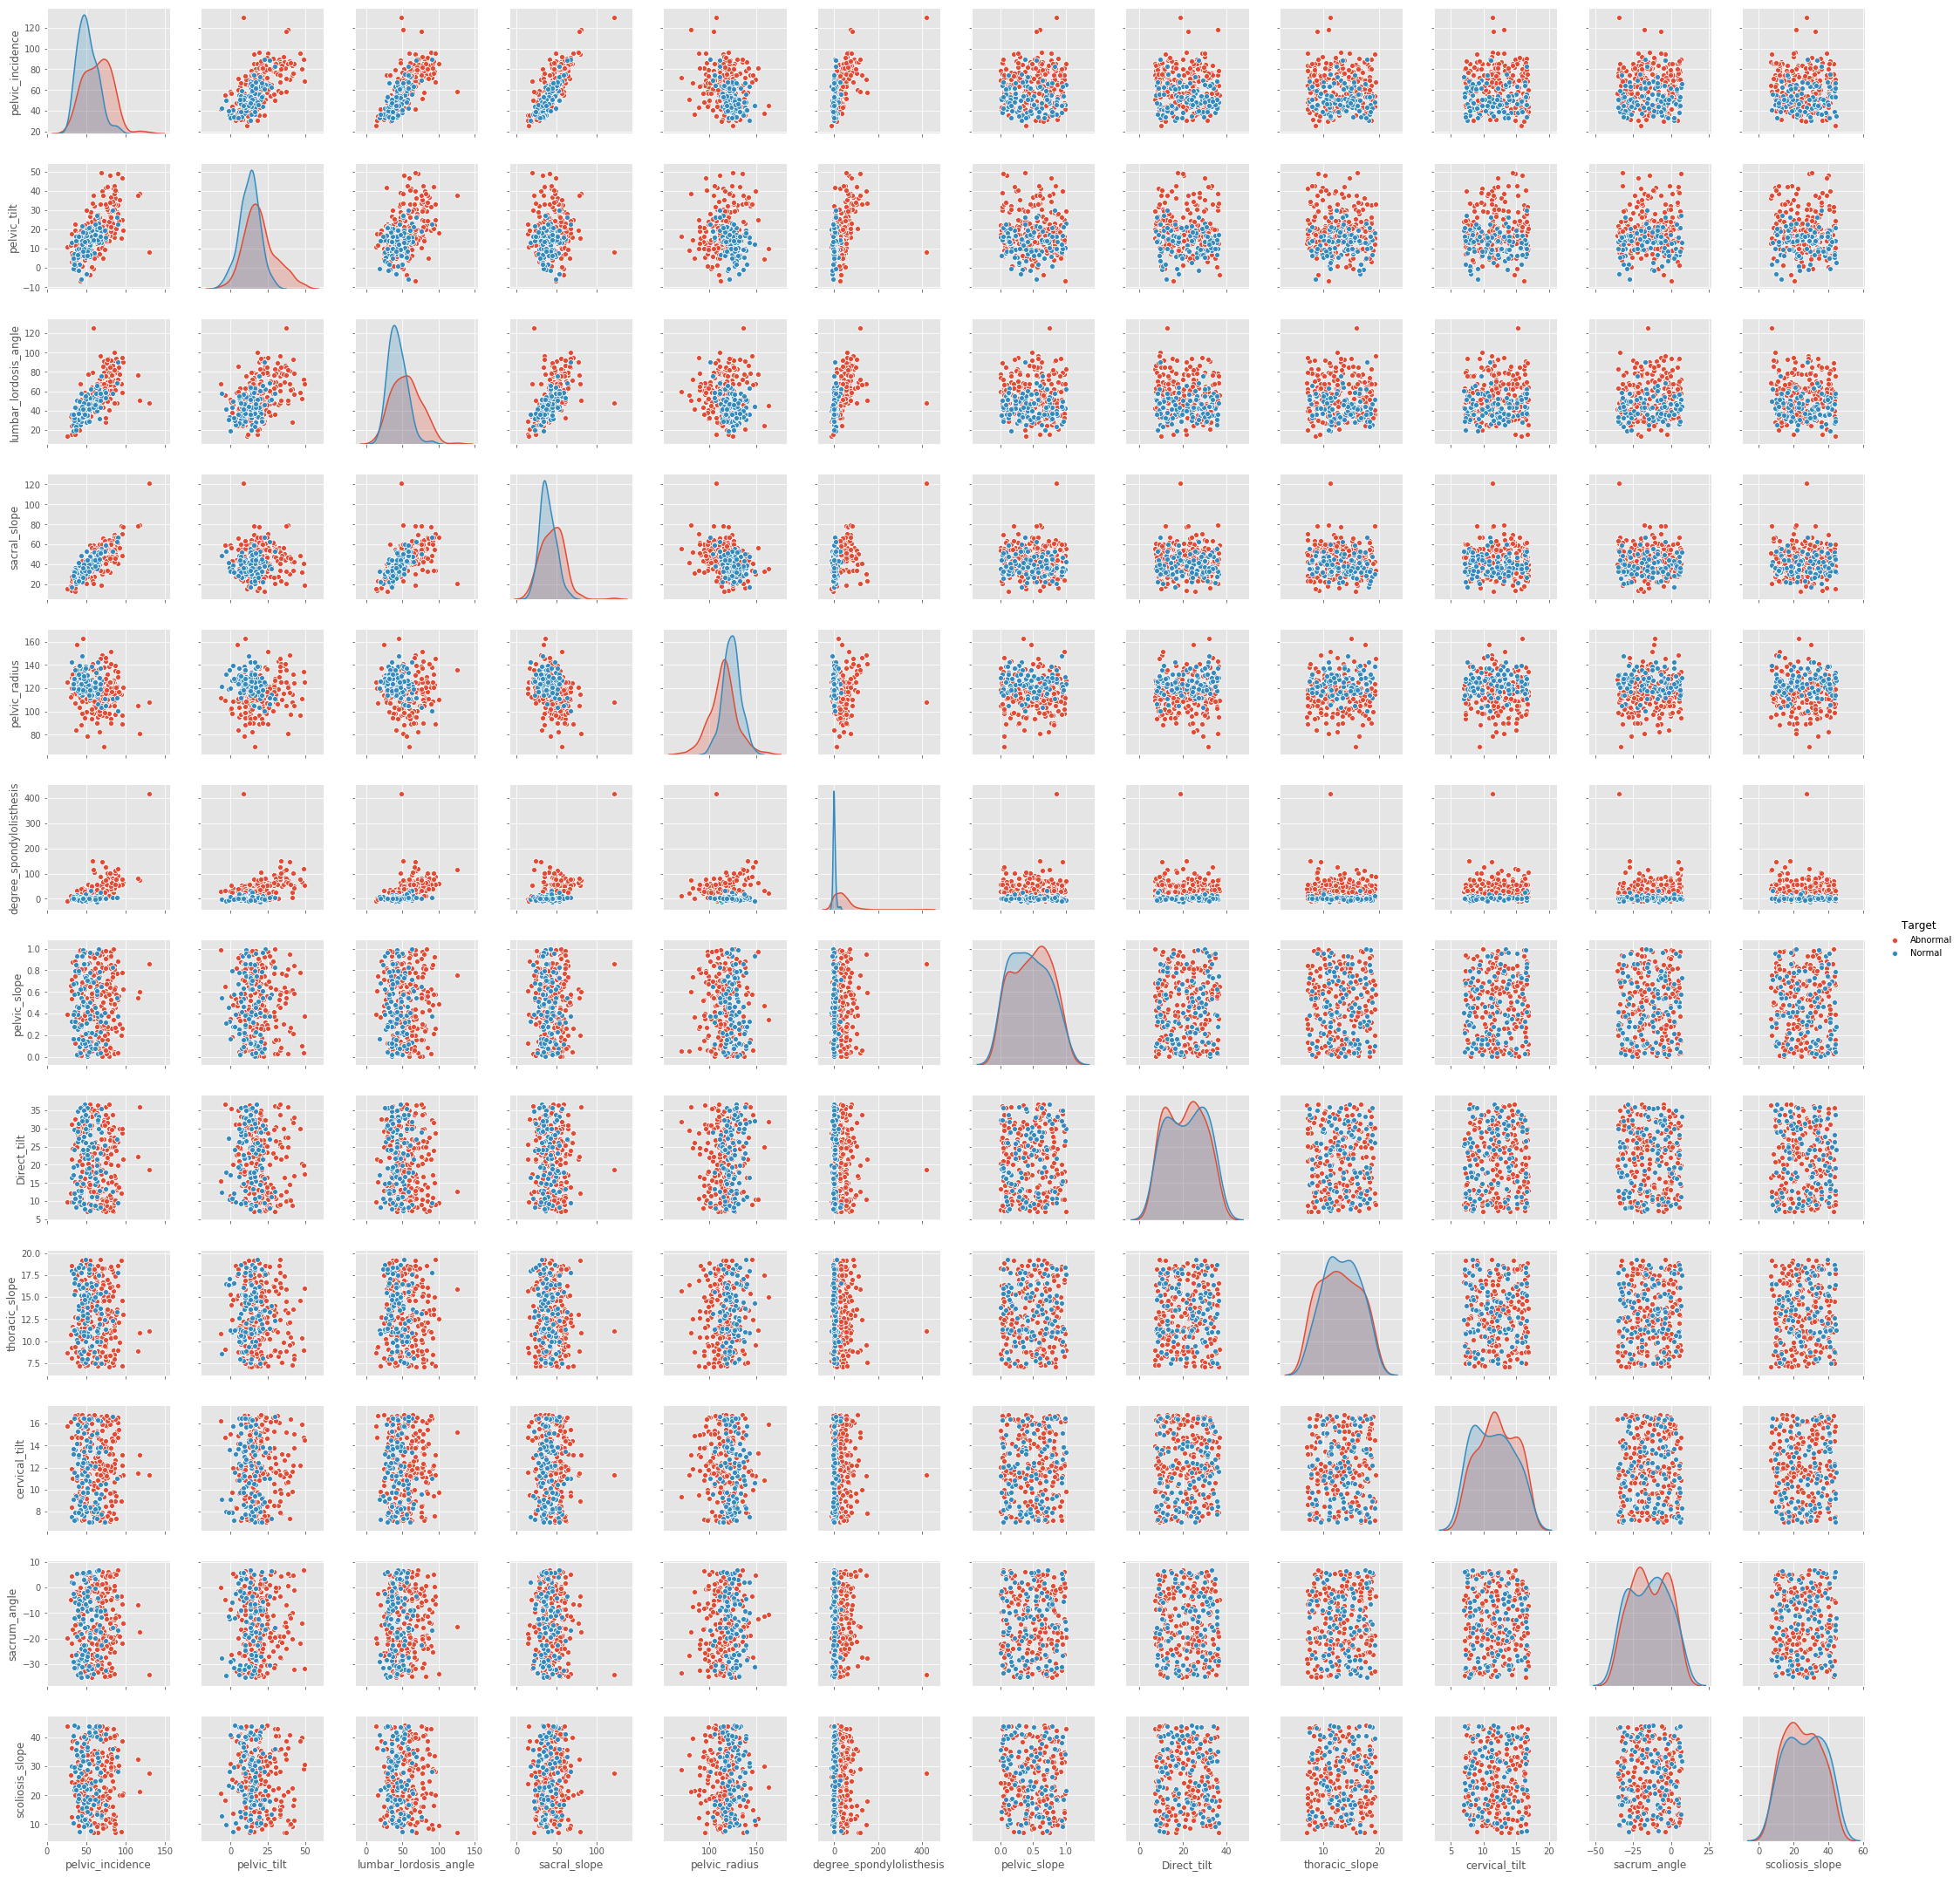

In [17]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='Target')
plt.show()

#### Feature Scaling
Certain algorthms do not perform well with highly varying magnitudes. To avoid this, we scale the features using Standard Scaler.

In [18]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Target', axis=1))
scaled_df = pd.DataFrame(data=scaled_df, columns=df.columns[:-1])
scaled_df['Target'] = df['Target']
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Target
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,Abnormal
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,Abnormal
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686,Abnormal
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,Abnormal
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858,Abnormal


#### Label Encoding

In [19]:
scaled_df['Target'] = scaled_df['Target'].replace(['Abnormal', 'Normal'], [1, 0])

#### Split data into train and test sets

In [22]:
X = scaled_df.drop('Target', axis=1)
y = scaled_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Train and Test the models

In [26]:
# Naive Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)
pred = bayes.predict(X_test)

In [27]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19  2]
 [14 43]]
             precision    recall  f1-score   support

          0       0.58      0.90      0.70        21
          1       0.96      0.75      0.84        57

avg / total       0.85      0.79      0.81        78



In [28]:
# K Nearest Neighbors
neighbors = KNeighborsClassifier(n_neighbors=4)
neighbors.fit(X_train, y_train)
pred = neighbors.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[16  5]
 [20 37]]
             precision    recall  f1-score   support

          0       0.44      0.76      0.56        21
          1       0.88      0.65      0.75        57

avg / total       0.76      0.68      0.70        78



In [32]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

In [33]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13  8]
 [ 8 49]]
             precision    recall  f1-score   support

          0       0.62      0.62      0.62        21
          1       0.86      0.86      0.86        57

avg / total       0.79      0.79      0.79        78



In [35]:
# Support Vector Machine
sv_c = SVC()
sv_c.fit(X_train, y_train)
pred = sv_c.predict(X_test)

In [36]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[14  7]
 [ 7 50]]
             precision    recall  f1-score   support

          0       0.67      0.67      0.67        21
          1       0.88      0.88      0.88        57

avg / total       0.82      0.82      0.82        78

